In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py

%matplotlib inline

In [22]:
h5_filepath = "/home/jwalker/data/NeutronGNN/iwcd_mpmt_shorttank_neutrongnn_trainval_10files.h5"
idx_filepath = "/home/jwalker/data/NeutronGNN/iwcd_mpmt_shorttank_neutrongnn_trainval_idxs_10files_test.npz"

# Explore indx file

In [26]:
indices_data = np.load(idx_filepath)
indices_data.files
print(len(indices_data['train_idxs']))
print(len(indices_data['val_idxs']))
print(len(indices_data['test_idxs']))
print(len(indices_data['exc_idxs']))
print(indices_data['train_idxs'])
print(indices_data['val_idxs'])
print(indices_data['test_idxs'])
print(indices_data['exc_idxs'])
flag = True
for idx in indices_data['train_idxs']:
    if idx in indices_data['val_idxs']:
        flag = False
        print('index in val split!')
    elif idx in indices_data['test_idxs']:
        flag = False
        print('index in test split!')
    elif idx in indices_data['exc_idxs']:
        flag = False
        print('index in exc split!')
if flag:
    print('no duplicate indices!')

1618
1618
1618
11326
[ 7190 14341  5750 ... 14748 11981  9463]
[15727  8980 14853 ...  1665  3997 10277]
[ 6645 15014  2645 ... 15248  6139    97]
[ 5960 10325  8892 ... 11180  1761  5604]
no duplicate indices!


# Explore h5 data format

['angles', 'energies', 'event_data', 'event_ids', 'labels', 'nhits', 'positions', 'root_files']
<HDF5 dataset "nhits": shape (16180,), type "<i4">


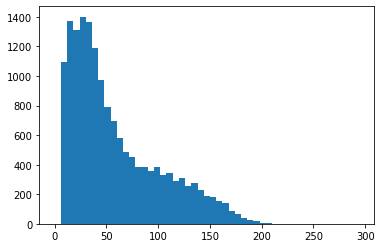

In [20]:
with h5py.File(h5_filepath, 'r') as file:
    print(list(file.keys()))
    h5_event_data = file['event_data']
    h5_nhits = file['nhits']
    print(h5_nhits)
    event_mem_data = np.memmap(h5_filepath, mode='r', shape=h5_event_data.shape,
                               offset=h5_event_data.id.get_offset(),
                               dtype=h5_event_data.dtype)
    non_zero = [np.count_nonzero(event_mem_data[i,:,0]) for i in range(0, event_mem_data.shape[0])]
    non_zero  = np.array(non_zero)
    nhits = np.array(h5_nhits)
    #plt.hist(non_zero, bins=np.arange(0, 300, 6))
    plt.hist(non_zero, bins=np.arange(0, 300, 6))

In [5]:
with h5py.File(h5_filepath, 'r') as file:
    print(list(file.keys()))
    angles = np.array(file['angles'])
    print('angles', angles.shape, angles[0,:])
    energies = np.array(file['energies'])
    print('energies', energies.shape, energies[0,:])
    event_data = np.array(file['event_data'])
    print('event_data', event_data.shape, event_data[0,:,:])
    event_ids = np.array(file['event_ids'])
    print('event_ids', event_ids.shape, event_ids[0])
    labels = np.array(file['labels'])
    print('labels', labels.shape, labels[0])
    positions = np.array(file['positions'])
    print('positions', positions.shape, positions[0,:,:])
    root_files = np.array(file['root_files'])
    print('root_files', root_files.shape, root_files[0])
    nhits = np.array(file['nhits'])
    print('nhits', nhits.shape, nhits[0])
    
    #event_mem_data = np.memmap(h5_filepath, mode='r', shape=event_data.shape,
    #                           offset=event_data.id.get_offset(),
    #                           dtype=event_data.dtype)
    hit = [np.count_nonzero(event_data[i,:,0]) for i in range(0, event_data.shape[0])]
    hit = np.array(hit)
    energies = energies[:,0]
    print(labels.shape, energies.shape, hit.shape)
    #np.savez("label_energy_hit.npz", label=labels, energy=energies, hit=hit)

['angles', 'energies', 'event_data', 'event_ids', 'labels', 'nhits', 'positions', 'root_files']
angles (16180, 2) [ 2.55912   -2.3508599]
energies (16180, 1) [7.9594355]
event_data (16180, 300, 8) [[ 8.3751422e-01  9.4809998e+02 -3.6388382e+02 ...  8.5426390e-01
   5.0903696e-01 -1.0542578e-01]
 [ 1.4909995e+00  9.5429999e+02 -3.0273074e+02 ...  5.7206142e-01
  -5.8778524e-01  5.7206142e-01]
 [ 1.2998122e+00  9.6709998e+02 -1.6140587e+02 ... -1.5450850e-01
  -9.5105654e-01  2.6761657e-01]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
event_ids (16180,) 0
labels (16180,) 1
positions (16180, 1, 3) [[-45.7129  180.73282  71.41624]]
root_files (16180,) /project/6008045/machine_learning/data/IWCDshort_ncapt/WCSim/e-/E0to20MeV/unif-pos-R40

## Overall data

(array([0.000e+00, 1.098e+03, 1.375e+03, 1.313e+03, 1.401e+03, 1.367e+03,
        1.189e+03, 9.700e+02, 7.900e+02, 6.950e+02, 5.800e+02, 4.840e+02,
        4.550e+02, 3.850e+02, 3.850e+02, 3.590e+02, 3.820e+02, 3.270e+02,
        3.450e+02, 2.880e+02, 3.100e+02, 2.560e+02, 2.740e+02, 2.270e+02,
        1.910e+02, 1.840e+02, 1.570e+02, 1.410e+02, 8.500e+01, 6.700e+01,
        4.000e+01, 2.800e+01, 1.900e+01, 8.000e+00, 4.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]),
 array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
         78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150,
        156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228,
        234, 240, 246, 252, 258, 264, 270, 276, 282, 288, 294]),
 <a list of 49 Patch objects>)

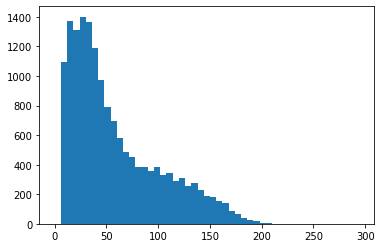

In [16]:
#print(hit)
plt.hist(nhits, bins=np.arange(0, 300, 6))


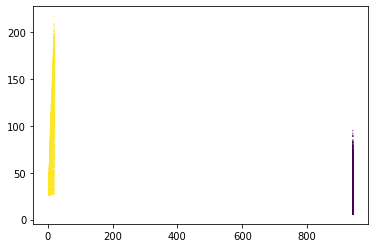

In [18]:
plt.scatter(energies, hit, c=labels, s=0.1)

In [8]:
# max energy
print(max(energies))

940.56537


(array([7869.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        8311.]),
 array([  2.44401,  96.25615, 190.06828, 283.88043, 377.69257, 471.5047 ,
        565.31683, 659.12897, 752.9411 , 846.75323, 940.56537],
       dtype=float32),
 <a list of 10 Patch objects>)

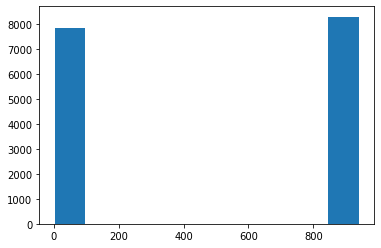

In [9]:
plt.hist(energies)

(array([8311.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7869.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

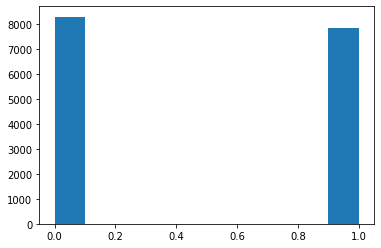

In [17]:
plt.hist(labels)

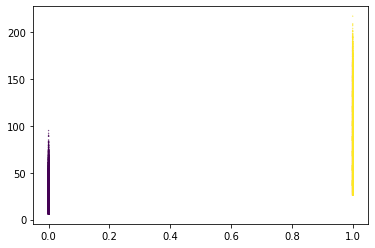

In [19]:
plt.scatter(labels, nhits, c=labels, s=0.1)

# Event value check

In [10]:
# with h5py.File(h5_filepath, 'r') as file:
    
#     h5_event_data = file['event_data']
#     length = h5_event_data.shape[0]
#     print(length)
    
#     event_subset = h5_event_data[sorted(np.random.permutation(length)[:20])]
#     event_subset = np.array(event_subset)
    
#     charge_per_event = event_subset[:,:,0]
#     time_per_event = event_subset[:,:,1]

# print(charge_per_event.shape, time_per_event.shape)
# np.savez("charge_time.npz", charge_per_event=charge_per_event, time_per_event=time_per_event)

In [11]:
charge_per_event = event_data[:,:,0][:20]
time_per_event = event_data[:,:,1][:20]

## Time

In [12]:
time_per_event = [time_per_event[i][np.nonzero(time_per_event[i])] for i in range(time_per_event.shape[0])]

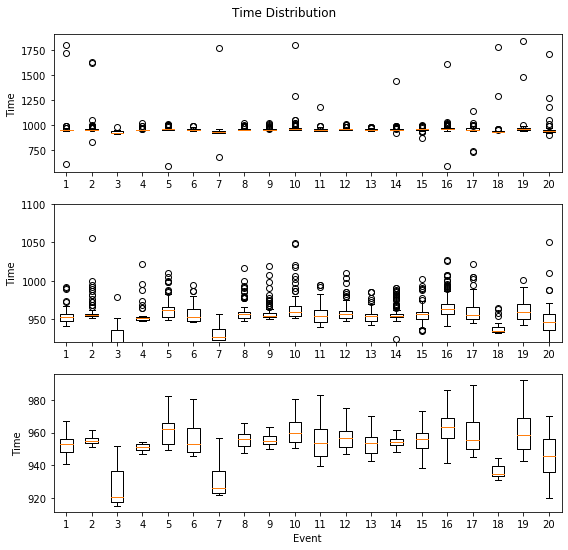

In [13]:
fig = plt.figure(figsize=(8,8))
fig.suptitle("Time Distribution")

plt.subplot(311)
plt.boxplot(time_per_event)
plt.ylabel("Time")

plt.subplot(312)
plt.boxplot(time_per_event)
plt.ylim([920,1100])
plt.ylabel("Time")

plt.subplot(313)
plt.boxplot(time_per_event, showfliers=False)
plt.ylabel("Time")
plt.xlabel("Event")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Charge

In [14]:
charge_per_event = [charge_per_event[i][np.nonzero(charge_per_event[i])] for i in range(charge_per_event.shape[0])]

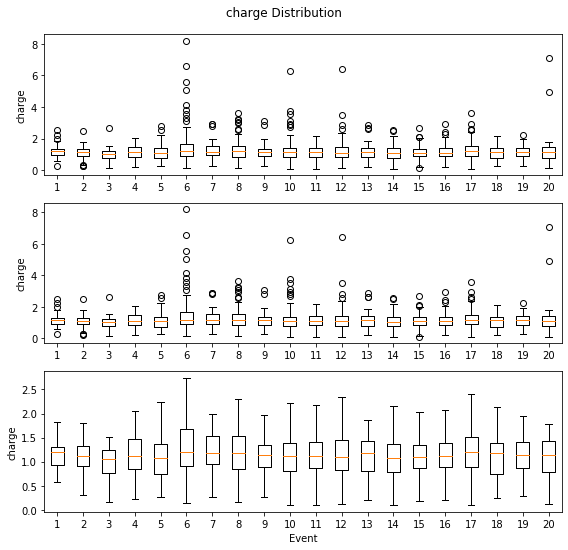

In [15]:
fig = plt.figure(figsize=(8,8))
fig.suptitle("charge Distribution")

plt.subplot(311)
plt.boxplot(charge_per_event)
plt.ylabel("charge")

plt.subplot(312)
plt.boxplot(charge_per_event)
plt.ylabel("charge")

plt.subplot(313)
plt.boxplot(charge_per_event, showfliers=False)
plt.ylabel("charge")
plt.xlabel("Event")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])